# CSE 5819 Assignment #6

**by: Aayushi Verma (uef24001)**

*due: Fri 10/28/24*

## Part 3 [Programming] (20 pts)

In earlier HWs, you have already loaded the Seaborn Iris dataset. The dataset has four features: 

- **sepal_length**
- **sepal_width**
- **petal_length**
- **petal_width**

and one target: **species**. It has three flower species: **setosa**, **versicolor**, and **virginica**. For this problem, please ignore **virginica**, meaning drop those data labeled with virginica.

Use sklearn's stratification partition to partition the Iris data into 70% for training and 30% for testing. Then use the sklearn function `sklearn.svm.SVC` to create a Support Vector Classifier that separates iris species between setosa and versicolor (please use C=1).


### (1) [5 pts] 
Please draw a ROC curve to represent the performance of your SVC.


### (2) [5 pts] 
Remember in HW4, you have already created a logistic regression classifier. Please draw a ROC curve for that classifier on the same plot, and compare the two classifiers.


### (3) [10 pts] 
Using your training data, tune the SVC’s hyperparameter C. Note that to avoid cheating on the final test performance, you should have another random split within your training data or use cross-validation on your training data to compare the performance of SVC when choosing different values of C. Once you observe the best cross-validation performance, fix C to that optimal value and retrain your SVC using the full training data. Then apply that final classifier to your test data. Report the classification accuracy of the final classifier on the test data. Print two columns for the test dataset where the first one is the ground truth labels and the second one is your model’s predictions.


## Problems, Question Two

**You have been asked to develop a classification model for diagnosing whether a patient is infected with a certain disease. To help you construct the models, your collaborator has provided you with a small training set (N=10 individuals) with an equal number of positive and negative examples. You tried several approaches and found two most promising models, C1 and C2. The outputs of the models in terms of predicting whether each of the training examples belong to the “positive (+)” class are summarized in the table below. The first row shows the probability a training example belongs to the positive class according to the classifier C1, while the second row shows the same information for classifier C2. The last row indicates the true class labels of the 10 training examples.**

![Image of Table](media/hw5_q2.png)

**For each model, we will evaluate different thresholds within the range of [0,1], and a sample with probability P(y=+ | C1) (or P(y=+ | C2)) that is lower than this threshold will be estimated as -, or + if greater than this threshold. By varying the thresholds (referred to in the lecture slide on ROC), you can study the model performance and draw the ROC. (You can either use code or hand-calculation, but if you use code, you need to show the calculation process.)**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Let's code this up. First let's denote each class of $y$ numerically: let the - class be represented by 0, and +class by 1.

In [2]:
c1 = [0.1, 0.15, 0.2, 0.3, 0.31, 0.4, 0.62, 0.77, 0.81, 0.95]
c2 = [0.25, 0.49, 0.05, 0.35, 0.66, 0.6, 0.7, 0.65, 0.55, 0.99]
y = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1]

Now let's define the functions to first calculate TPR and FPR, and then plot the ROC curve.

In [3]:
def calculate_roc_curve(class_probs, true_labels):
    # Step 1: Create a dataframe from class probabilities and true labels
    df = pd.DataFrame({'class_prob': class_probs, 'true_label': true_labels})
    
    # Step 2: Sort by class probabilities in ascending order
    df = df.sort_values(by='class_prob')
    
    # Initialize variables for ROC
    thresholds = sorted(df['class_prob'].unique())
    tpr_list = []  # True Positive Rate (TPR)
    fpr_list = []  # False Positive Rate (FPR)

    for threshold in thresholds:
        TP = FP = TN = FN = 0
        current_threshold = threshold
        
        # Step 3: Iterate over the probabilities and calculate TP, FP, TN, FN
        for _, row in df.iterrows():
            if row['class_prob'] >= current_threshold:
                if row['true_label'] == 1:
                    TP += 1
                else:
                    FP += 1
            else:
                if row['true_label'] == 1:
                    FN += 1
                else:
                    TN += 1
        
        # Step 4: Calculate TPR and FPR
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate
        
        tpr_list.append(TPR)
        fpr_list.append(FPR)

    # Return TPR and FPR lists for plotting the ROC curve
    return fpr_list, tpr_list

def plot_roc_curve(fpr_list, tpr_list, class_label):
    # Step 1: Create the plot
    plt.figure(figsize=(8, 6))
    
    # Step 2: Plot FPR against TPR
    plt.plot(fpr_list, tpr_list, color='blue', marker='o', linestyle='-', label='ROC Curve')
    
    # Step 3: Plot the diagonal line representing random guess
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
    
    # Step 4: Set labels and title
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {class_label}')
    plt.legend(loc='lower right')
    
    # Step 5: Show the plot
    plt.grid(True)
    plt.show()

Now let's plot the ROC curve for each class C1 and C2:

In [4]:
# class_probs = [0.95, 0.93, 0.87, 0.85, 0.85, 0.85, 0.76, 0.53, 0.43, 0.25]
# true_labels = [1, 1, 0, 0, 0, 1, 0, 1, 0, 1]

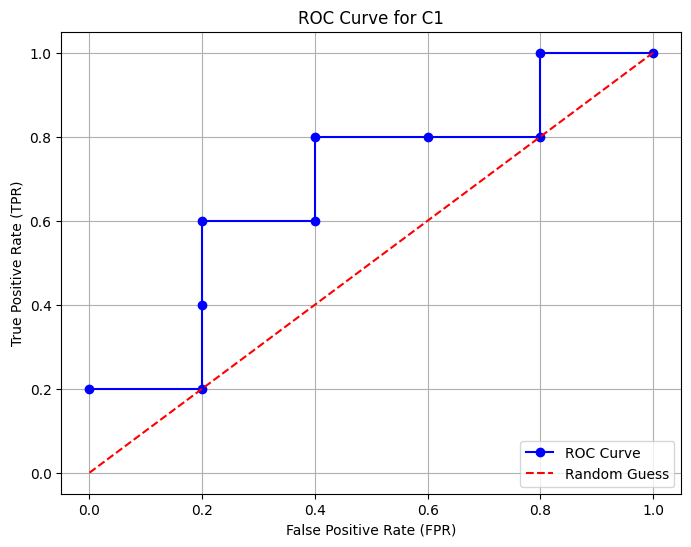

In [5]:
c1_fpr_list, c1_tpr_list = calculate_roc_curve(c1, y)
plot_roc_curve(c1_fpr_list, c1_tpr_list, 'C1')

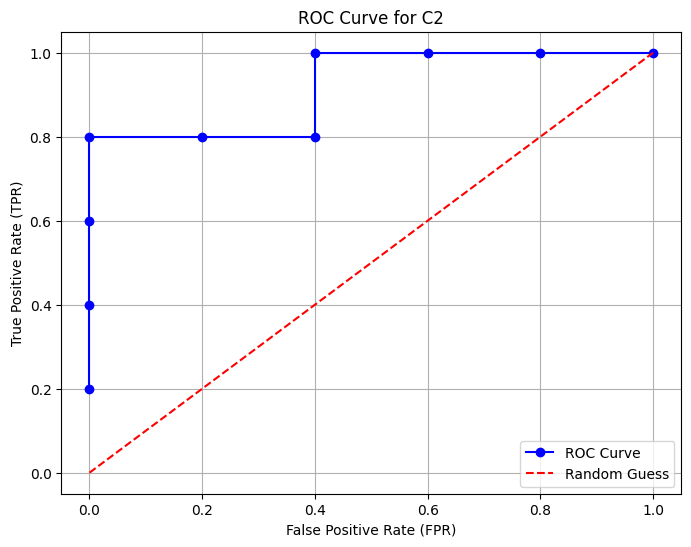

In [6]:
c2_fpr_list, c2_tpr_list = calculate_roc_curve(c2, y)
plot_roc_curve(c2_fpr_list, c2_tpr_list, 'C2')

## Part 2 [Programming] (40 pts)

**In earlier HWs, you have already loaded the Seaborn Iris dataset (The dataset has four features: sepal_length, sepal_width, petal_length, petal_width, and one target: species. It has three flower species: setosa, versicolor, and virginica), and you have already created codes for stratified partition of your data.**

**Use sklearn stratification partition to partition the Iris data into 70% in training and 30% in test. Then use the scikit-learn package KNeighborsClassifier to predict the species for your test examples based on your training set. (Here is the website: [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html))**

**Besides reporting the classification accuracy, print two columns for the test dataset where the first one is the ground truth labels and the second one is the corresponding predicted labels of your K-Nearest Neighbor classifier.**


In [7]:
# importing packages
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

First we load the dataset using the Seaborn library. 

**Note to TA:** I was having issues loading the dataset from Seaborn (ssl certificate error) so instead downloaded a local csv of the dataset. For the submission of this assignment on Google Colab, I will comment out my code which uses the local download of the datatset and keep the original line of code, and hope that it works on your end.

In [8]:
# # downloading the dataset from the Seaborn library
# iris = sns.load_dataset('iris')

# # dropping 'virginica' data
# iris = iris.drop(iris[iris['species'] == 'virginica'].index)

In [9]:
# loading the iris dataset from my locally-downloaded version
iris = pd.read_csv('iris.csv')
# renaming the columns to match the Seaborn version
iris.rename(columns={
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'
}, inplace=True)

# dropping the Id column since Seaborn version doesn't have it
iris.drop(columns=['Id'], inplace=True)

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now that we have converted the Iris dataset into a numerical dataset, we can proceed by making `X` and `y` subsets of the data.

In [11]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y = iris['species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [13]:
# splitting the data into train and test sets with stratified partitioning for y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [14]:
# instantiating the LogReg model and fitting the training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# using test data to make predictions
y_pred = knn.predict(X_test)

In [16]:
# getting the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy:.2f}')

Classification Accuracy: 0.96


We note that the classification accuracy for our K-Nearest Neighbors model is 96%. This is expected of the Iris dataset due to its small data size and predictable patterns in the data.

In [17]:
# printing the true vs predicted labels
results = pd.DataFrame({'True species': y_test, 'Predicted species': y_pred})
results

,True species,Predicted species
107,Iris-virginica,Iris-virginica
63,Iris-versicolor,Iris-versicolor
133,Iris-virginica,Iris-versicolor
56,Iris-versicolor,Iris-versicolor
127,Iris-virginica,Iris-virginica
140,Iris-virginica,Iris-virginica
53,Iris-versicolor,Iris-versicolor
69,Iris-versicolor,Iris-versicolor
20,Iris-setosa,Iris-setosa
141,Iris-virginica,Iris-virginica
